In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
# Set constants
REPOSITORY='/home/ebb505/Downloads/pmnipes_straightLine/pop_morph_nipes_16_1_12-29-48-8334-1306887498/'
FILE_FITNESSES='fitnesses.csv'

In [3]:
# Get all directories
FOLDERS = []
FOLDERS_NAMES = []
# r=root, d=directories, f = files
for r, d, f in os.walk(REPOSITORY):
    for folder in d:
        temp_folder = folder.split("_")
        FOLDERS_NAMES.append(temp_folder[1])
        FOLDERS.append(os.path.join(r, folder))
print("Folders: ", len(FOLDERS))

Folders:  101


In [4]:
# Get data evolved robots
LIST_FITNESSES = []
for f in FOLDERS:
    temp_filepath = f + '/' + FILE_FITNESSES
    temp_list = []
    if os.path.isfile(temp_filepath):
        #print ("File exist: " + temp_filepath)
        with open(temp_filepath, 'r') as csvfile:
            data = csv.reader(csvfile, delimiter=',', quotechar='"')
            for row in data:
                temp_list.append(row[:-1]) # Last character is empty for some reason
        LIST_FITNESSES.append(temp_list)
    else:
        print ("File not exist: " + temp_filepath)
        LIST_FITNESSES.append(temp_list)

File not exist: /home/ebb505/Downloads/pmnipes_straightLine/pop_morph_nipes_16_1_12-29-48-8334-1306887498/morph_0/fitnesses.csv


In [5]:
REPLICATES = len(LIST_FITNESSES)
print("Replicates: ", REPLICATES)

Replicates:  101


In [6]:
# Transform to array
replicates_data = []
for rep in range(REPLICATES):
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in LIST_FITNESSES[rep]]) # Convert to array
    replicates_data.append(tempDat)

In [7]:
print(len(replicates_data))
print(len(replicates_data[0]))
print(len(replicates_data[0][0]))
print(replicates_data[0][0][0])

101
1
43
1.0


In [8]:
# Extract information
replicates_fitness = []
for rep in range(REPLICATES):
    temp_list = []
    temp_generations = len(replicates_data[rep])
    if(temp_generations > 0):
        for i in range(3, len(replicates_data[rep][temp_generations-1]), 2):
            temp_data = 1 - replicates_data[rep][temp_generations-1][i]
            temp_list.append(temp_data)
        replicates_fitness.append(temp_list)
    else:
        temp_list.append(0.64)
        replicates_fitness.append(temp_list)

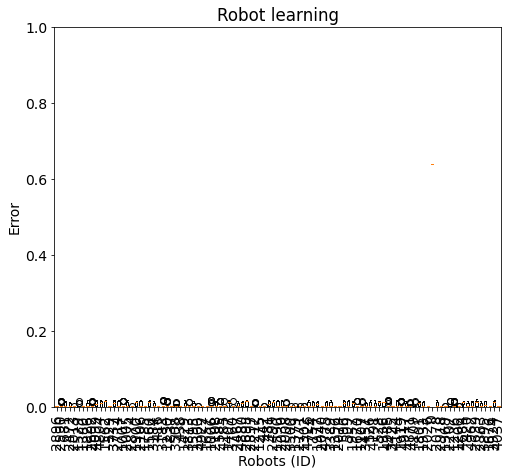

In [9]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(figsize=(8, 7))
# 
plt.boxplot(replicates_fitness)
axes = plt.gca()
axes.set_ylim([0,1])
TICKPOS =  range(1, REPLICATES+1, 1)
TICKLABEL = [str(i) for i in FOLDERS_NAMES]
plt.xticks(TICKPOS, TICKLABEL)
plt.xticks(rotation=90)
plt.title('Robot learning')
plt.xlabel('Robots (ID)')
plt.ylabel('Error')
plt.savefig(REPOSITORY+'BoxPlot.png',dpi=200)

In [10]:
# Extract information
list_maxFitness = []
for rep in range(REPLICATES):
    list_maxFitness.append(replicates_fitness[rep].index(min(replicates_fitness[rep])))
    #print(min(replicates_fitness[rep]))
    print(replicates_fitness[rep].index(min(replicates_fitness[rep])))

2
7
12
12
0
10
7
1
4
11
13
10
1
4
12
2
11
8
9
9
9
0
19
4
10
10
5
18
14
15
15
13
5
1
6
11
4
17
7
6
15
13
12
12
13
9
4
13
4
12
5
3
18
3
16
14
18
8
5
17
3
9
17
15
3
2
13
15
14
6
3
0
12
13
15
13
17
3
2
7
10
18
3
6
6
0
19
18
4
4
12
15
4
5
7
9
13
6
18
5
1


In [52]:
# Get data evolved robots
file_trajectory = 'traj_'
i = 0
LIST_TRAJECTORIES = []
for f in FOLDERS:
    
    temp_filepath = f + '/' + file_trajectory + str(len(replicates_data[i])) + '_' +str(list_maxFitness[i])
    print(file_trajectory + str(len(replicates_data[i])) + '_' +str(list_maxFitness[i]))
    temp_list = []
    if os.path.isfile(temp_filepath):
        #print ("File exist: " + temp_filepath)
        with open(temp_filepath, 'r') as csvfile:
            data = csv.reader(csvfile, delimiter=',', quotechar='"')
            for row in data:
                temp_list.append(row[:2]) # Last character is empty for some reason
        LIST_TRAJECTORIES.append(temp_list)
    else:
        print ("File not exist: " + temp_filepath)
        LIST_TRAJECTORIES.append(temp_list)
    i = i + 1

traj_35_4
traj_37_16
traj_5_296
traj_35_24
traj_35_38
File not exist: /home/ebb505/ARE_Project/are-logs/pop_morph_nipes_29_0_16-33-46-6559-549145740/pop_morph_nipes_29_0_16-33-46-6559-549145740/morph_2866/traj_35_38
traj_21_43
traj_6_145


In [53]:
# Transform to array
replicates_trajectories = []
for rep in range(REPLICATES):
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in LIST_TRAJECTORIES[rep]]) # Convert to array
    replicates_trajectories.append(tempDat)
print(replicates_trajectories[3][:])

[[ 0.         -0.5       ]
 [-0.00411048 -0.480208  ]
 [-0.0388562  -0.451514  ]
 [-0.0622088  -0.408981  ]
 [-0.0658337  -0.359293  ]
 [-0.048714   -0.311475  ]
 [-0.0163196  -0.276212  ]
 [ 0.0293461  -0.256329  ]
 [ 0.0797665  -0.256939  ]
 [ 0.125811   -0.27807   ]
 [ 0.159126   -0.316126  ]]


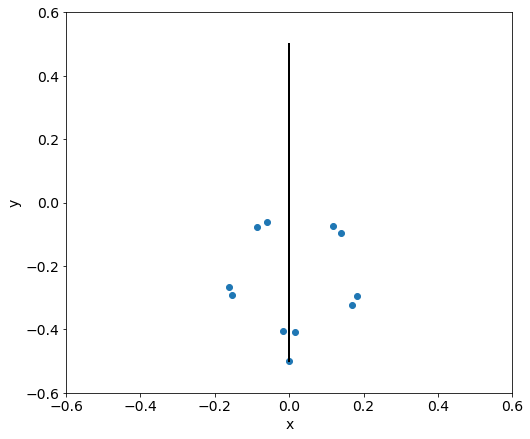

In [59]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(figsize=(8, 7))
# 
plt.scatter(replicates_trajectories[1][:,0], replicates_trajectories[1][:,1])
axes = plt.gca()
axes.set_xlim([-0.6,0.6])
axes.set_ylim([-0.6,0.6])
# TICKPOS =  range(1, REPLICATES+1, 1)
# TICKLABEL = [str(i) for i in FOLDERS_NAMES]
# plt.xticks(TICKPOS, TICKLABEL)
# plt.xticks(rotation=90)
# plt.title('Robot learning')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([0, 0], [-0.5, 0.5], color='k', linestyle='-', linewidth=2)
# plt.savefig(REPOSITORY+'Trajectory.png',dpi=200)